In [1]:
#importing libraries and dataframe
import pandas as pd
import matplotlib.pyplot as plt 
import warnings 
warnings.filterwarnings('ignore')
from nltk.corpus import stopwords
import re
import string
from sklearn.model_selection import train_test_split
from nltk.tokenize import word_tokenize
import seaborn as sns

df = pd.read_csv("C:/ML/python/data/Capsule Hotel Risk Classification Dataset (English Translated) - Sheet1.csv",delimiter=',')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          700 non-null    int64 
 1   content             700 non-null    object
 2   translated_content  700 non-null    object
 3   priority_score      700 non-null    int64 
 4   problem_domain      700 non-null    int64 
dtypes: int64(3), object(2)
memory usage: 27.5+ KB


In [2]:
df.isna().sum()

Unnamed: 0            0
content               0
translated_content    0
priority_score        0
problem_domain        0
dtype: int64

In [3]:
df.duplicated().sum()

0

In [4]:
df.dtypes

Unnamed: 0             int64
content               object
translated_content    object
priority_score         int64
problem_domain         int64
dtype: object

In [5]:
df.drop(['content','Unnamed: 0'],axis=1,inplace=True)


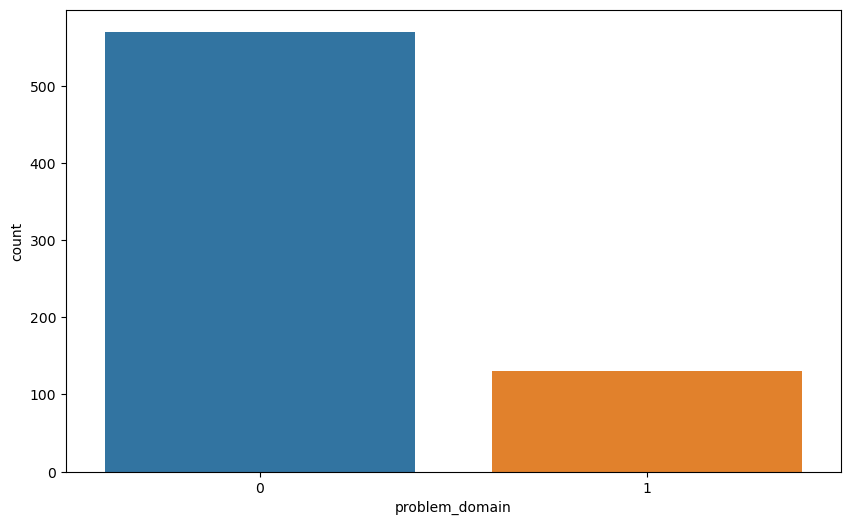

In [6]:
fig,axs = plt.subplots(figsize=(10,6))
sns.countplot(x='problem_domain',data=df)
plt.show()


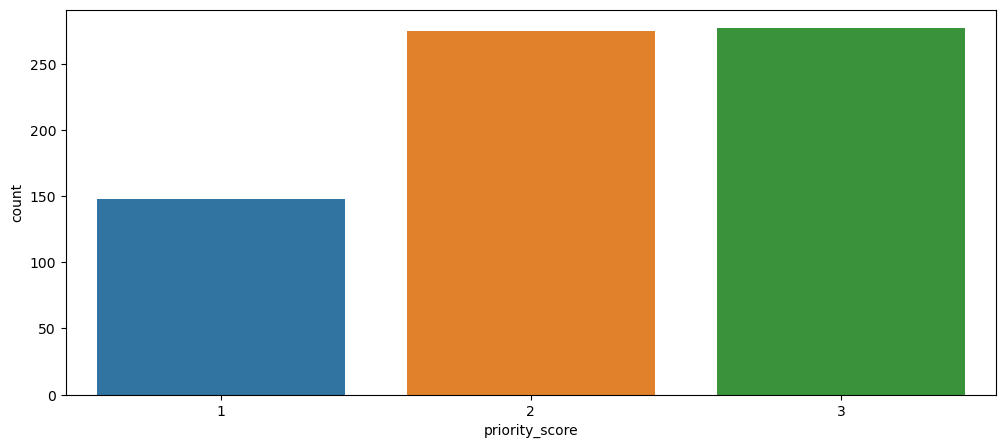

In [7]:
fig2,axs2 = plt.subplots(figsize=(12,5))
sns.countplot(x='priority_score',data=df)
plt.show()

In [8]:
#making 'translated_content' lower-cased for text processing
df['translated_content'] = df['translated_content'].str.lower()
df['translated_content'].head(10)

0    sorry, including the expensive price + apk usi...
1    after installed, the app stuck with white display
2    cannot submit the data verification, even my i...
3                              the app keep restarting
4                 overpriced, bad food, too many flies
5    the chat feature which is important, can't be ...
6    overpriced, at first i think it's cheaper than...
7    it's very noisy up there. please add the sound...
8         it's not seamless anyway. the service is bad
9         come on, i have to update the app frequently
Name: translated_content, dtype: object

In [9]:
#removing html tags
def remove_html_tags(text):
    pattern = r'<.*?>' 
    text = re.sub(pattern, '', text)
    return text




df['translated_content'] = df['translated_content'].apply(remove_html_tags)
df['translated_content'].head(10)

0    sorry, including the expensive price + apk usi...
1    after installed, the app stuck with white display
2    cannot submit the data verification, even my i...
3                              the app keep restarting
4                 overpriced, bad food, too many flies
5    the chat feature which is important, can't be ...
6    overpriced, at first i think it's cheaper than...
7    it's very noisy up there. please add the sound...
8         it's not seamless anyway. the service is bad
9         come on, i have to update the app frequently
Name: translated_content, dtype: object

In [10]:
#removing URL tags
def remove_urls(text):
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    return url_pattern.sub(r'', text)

df['translated_content'] = df['translated_content'].apply(remove_urls)
df['translated_content'].head(10)

0    sorry, including the expensive price + apk usi...
1    after installed, the app stuck with white display
2    cannot submit the data verification, even my i...
3                              the app keep restarting
4                 overpriced, bad food, too many flies
5    the chat feature which is important, can't be ...
6    overpriced, at first i think it's cheaper than...
7    it's very noisy up there. please add the sound...
8         it's not seamless anyway. the service is bad
9         come on, i have to update the app frequently
Name: translated_content, dtype: object

In [11]:
#removing puncutations and other noise
PUNC = string.punctuation


def remove_punctuations(text):
    return text.translate(str.maketrans("","",PUNC))
df['translated_content'] = df['translated_content'].apply(remove_punctuations)

df["translated_content"] = df["translated_content"].str.replace(r'\d', '')
df["translated_content"] = df["translated_content"].str.replace("[^\w\s]", '')
df['translated_content'] = df['translated_content'].replace('loading', '')
df['translated_content'] = df['translated_content'].replace('[\[\]\\]', '')
df['translated_content'] = df['translated_content'].replace("\\", '')
df['translated_content'].head(10)

0    sorry including the expensive price  apk using...
1     after installed the app stuck with white display
2    cannot submit the data verification even my in...
3                              the app keep restarting
4                   overpriced bad food too many flies
5     the chat feature which is important cant be used
6    overpriced at first i think its cheaper than r...
7    its very noisy up there please add the sound r...
8           its not seamless anyway the service is bad
9          come on i have to update the app frequently
Name: translated_content, dtype: object

In [12]:
#removing stopwords and tokenization

sw = set(stopwords.words("english"))


def remove_stopwords(text):
    tokens = word_tokenize(text)
    cleaned_tokens = [word for word in tokens if word.lower() not in sw]
    return " ".join(cleaned_tokens)


df['translated_content'] = df['translated_content'].apply(remove_stopwords)
df['translated_content'].head(10)

0    sorry including expensive price apk using engl...
1                    installed app stuck white display
2    submit data verification even internet stable ...
3                                  app keep restarting
4                       overpriced bad food many flies
5                     chat feature important cant used
6           overpriced first think cheaper refdorz oyo
7                       noisy please add sound reducer
8                          seamless anyway service bad
9                           come update app frequently
Name: translated_content, dtype: object

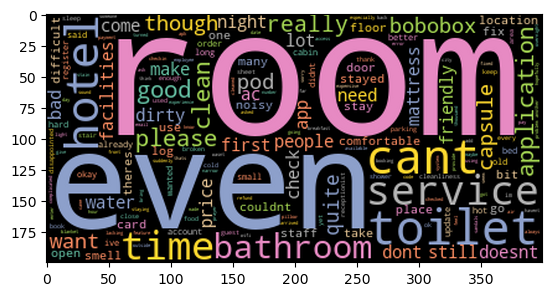

In [13]:
#wordcloud summary of most used words
text = " ".join(i for i in df['translated_content'])


from wordcloud import WordCloud




wc = WordCloud(colormap='Set2',collocations=False).generate(text)
plt.imshow(wc,interpolation='blackman')
plt.show()


In [14]:
#selecting target variable and the feature for train/test split
X = df['translated_content']
y = df['problem_domain']



X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.20,random_state=42)



In [15]:
#importing necceassary libraries from keras to create LSTM model
from tensorflow.keras.preprocessing.text import Tokenizer
from keras.models import Sequential
from keras.layers import LSTM,Embedding, Dense

num_words = 10000

tokenizer = Tokenizer(num_words)
tokenizer.fit_on_texts(X_train)

word_index = tokenizer.word_index


X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)


In [16]:
#using max_len to determine the padding
max_len = max([len(x) for x in X_train])
print(max_len)
from keras.utils import pad_sequences

X_train = pad_sequences(X_train,maxlen=max_len)
X_test = pad_sequences(X_test,maxlen=max_len)

120


In [17]:
X_train.shape

(560, 120)

In [18]:
X_test.shape

(140, 120)

In [19]:
y_train[123]

1

In [20]:
#ok, good, LSTM model
RNN = Sequential()
RNN.add(Embedding(len(word_index) + 1, output_dim=max_len, input_length=max_len))
RNN.add(LSTM(100,dropout=0.2,recurrent_dropout=0.2))
RNN.add(Dense(1, activation='sigmoid'))
RNN.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])

batch_size= 128

history = RNN.fit(X_train,y_train,epochs=10,batch_size=batch_size,validation_data=(X_test,y_test))
results = RNN.evaluate(X_test,y_test)


print('test loss, test accuracy',results)


Epoch 1/10
5/5 [==============================] - 9s 864ms/step - loss: 0.6750 - accuracy: 0.6964 - val_loss: 0.6220 - val_accuracy: 0.8000
Epoch 2/10
5/5 [==============================] - 4s 770ms/step - loss: 0.5633 - accuracy: 0.8179 - val_loss: 0.5269 - val_accuracy: 0.8000
Epoch 3/10
5/5 [==============================] - 3s 622ms/step - loss: 0.4835 - accuracy: 0.8179 - val_loss: 0.4957 - val_accuracy: 0.8000
Epoch 4/10
5/5 [==============================] - 3s 601ms/step - loss: 0.4454 - accuracy: 0.8179 - val_loss: 0.4832 - val_accuracy: 0.8000
Epoch 5/10
5/5 [==============================] - 3s 537ms/step - loss: 0.4328 - accuracy: 0.8179 - val_loss: 0.4679 - val_accuracy: 0.8000
Epoch 6/10
5/5 [==============================] - 3s 630ms/step - loss: 0.4028 - accuracy: 0.8179 - val_loss: 0.4626 - val_accuracy: 0.8000
Epoch 7/10
5/5 [==============================] - 3s 578ms/step - loss: 0.3805 - accuracy: 0.8196 - val_loss: 0.4372 - val_accuracy: 0.8000
Epoch 8/10
5/5 [====

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 120, 120)          167280    
                                                                 
 lstm (LSTM)                 (None, 100)               88400     
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 255781 (999.14 KB)
Trainable params: 255781 (999.14 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


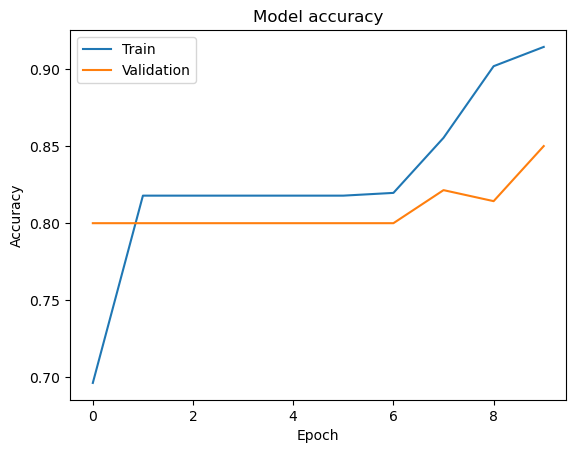

In [21]:
RNN.summary()
RNN.history

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()